# Retrieval of a continuous temperature profile

In this example, we show how archNEMESIS can be used to perform a retrieval of a continuous temperature profile. In particular, we are going to model Jupiter's thermal emission using instrument specifications relevant for the Composite Infrared Spectrometer (CIRS) on Cassini and retrieve the temperature profile using the Optimal Estimation formalism. 

In [1]:
import archnemesis as ans
import numpy as np
import matplotlib.pyplot as plt

## 1. Inspecting the input files

archNEMESIS includes the *read_input_files()* function, which automatically reads all input files and stores the information in the reference classes. Here, we explore some of the most important characteristics of this particular retrieval.

In [2]:
runname = 'cirstest'

#Reading the input files
Atmosphere,Measurement,Spectroscopy,Scatter,Stellar,Surface,CIA,Layer,Variables,Retrieval = ans.Files.read_input_files(runname)

### Atmosphere

The profiles in this example were identified as standard for CIRS data analysis.

- Temperature, pressure and altitude levels provided by Glenn Orton assuming *g* = 24 m s$^{-2}$.
- Ammonia assumed to be constant in the troposphere, limited by the saturation vapour pressure between 0.5-0.6 bar. Above this level, its abundance drops according to Fouchet et al. (1999). 
- Phosphine is the standard NIMS case.
- Hydrocarbons (including CH$_4$) from Romani note to CIRS team (7 May 1999) with deep CH$_4$ nudged to GPMS results.
- H$_2$ and He from Galileo entry probe.
- $^{13}$CH$_4$ (2) scaled from $^{12}$CH$_4$ (1) assuming terrestrial relative abundances.
- $^{12}$CH$_3$D (3) also scaled from $^{12}$CH$_4$ (1) but using $^{12}$CH$_3$D/$^{12}$CH$_4$ = 8 $\times$ 10$^{-5}$.

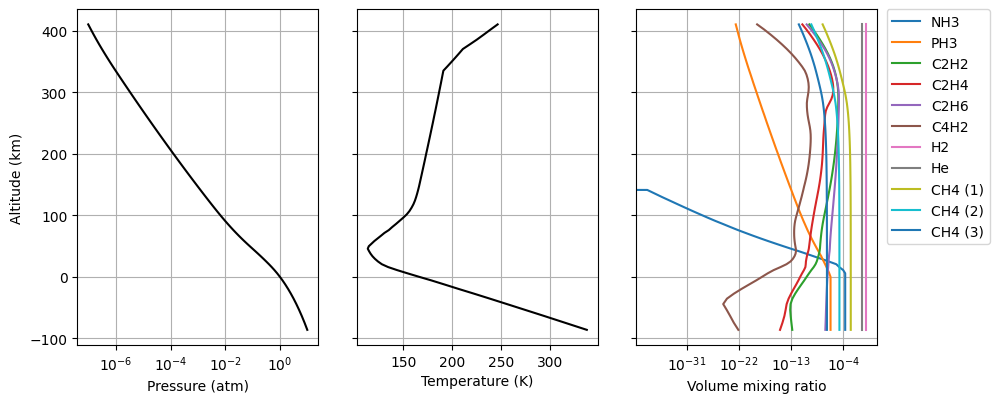

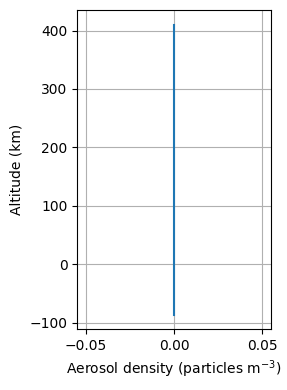

In [3]:
Atmosphere.plot_Atm()
Atmosphere.plot_Dust()

### Measurement

In this example, as we only want to model the spectrum, the information about the measured spectra is not relevant. However, the *.spx* file also defines the geometry of the observations and the spectral range and resolution to use.

The spectral range in this example goes from 5-1399 cm$^{-1}$. The *FWHM* of the instrument function is set to 0, which means that it is accounted for directly in the k-tables. In this simple example, all relevant angles were assumed to be zero. 

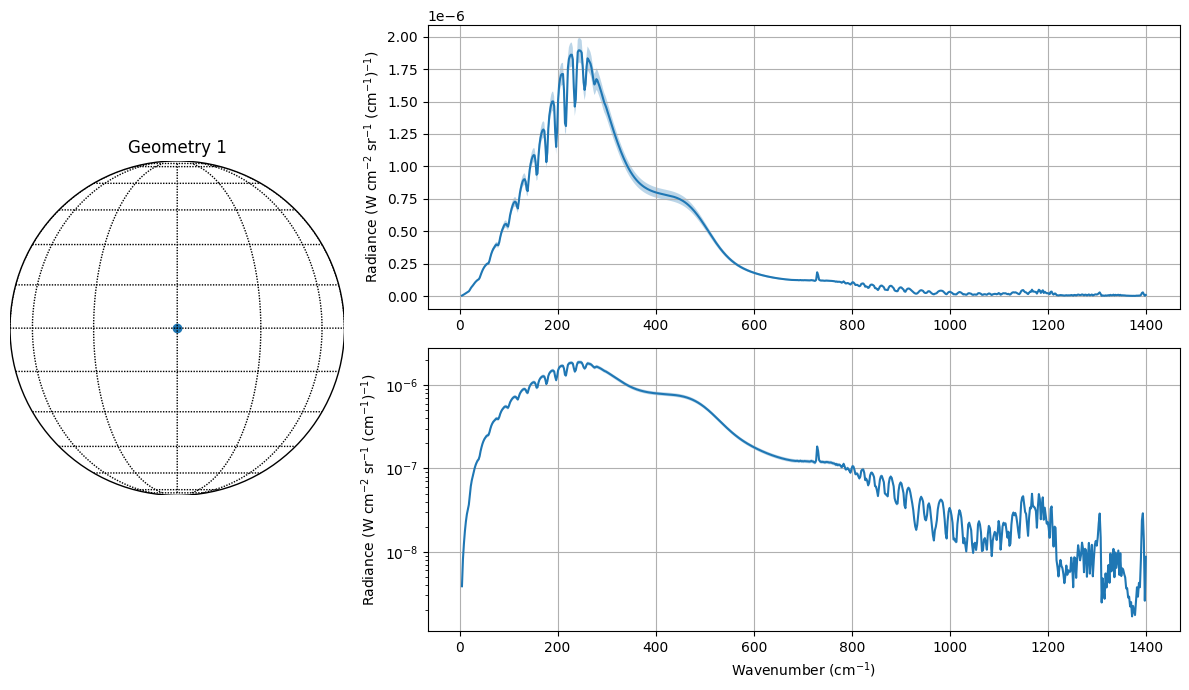

In [4]:
Measurement.plot_nadir()

### Variables

In this example, we choose a parameterisation that allows us to define the temperature in each altitude level. In particular, we choose the model parameterisation #0, which allows the definition of a continuous vertical profile.

In [5]:
print('VARIDENT')
print(Variables.VARIDENT)
print('')

print('Temperature in each altitude level')
print(Variables.XA)
print('')

VARIDENT
[[0 0 0]]

Temperature in each altitude level
[328.16 305.63 284.53 264.74 246.16 228.71 212.31 196.9  182.41 168.83
 156.1  144.21 133.41 124.3  117.86 113.89 110.75 108.25 106.26 104.68
 103.4  104.5  107.3  110.1  113.5  117.   120.5  125.   128.5  132.4
 136.   139.8  143.4  146.2  148.4  150.3  151.8  153.   154.1  155.1
 156.   156.83 157.66 158.49 159.32 160.15 160.98 161.81 162.64 163.47
 164.3  165.14 165.98 166.82 167.66 168.5  169.34 170.18 171.02 171.86
 172.7  173.53 174.36 175.19 176.02 176.85 177.68 178.51 179.34 180.17
 181.   185.   189.   193.   197.   201.   208.13 215.27 222.4  229.53
 236.67]



### Spectroscopy

In this example, we do not include the k-tables in the current working directory because of storage limitations, although these are available upon request.

Here, we include several radiatively active gases: C$_2$H$_2$, C$_2$H$_6$, $^{12}$CH$_4$, $^{13}$CH$_4$, $^{12}$CH$_3$D, PH$_3$ and NH$_3$.

The *FWHM* of the instrument function was included in the calculation of the k-tables, being 2.5 cm$^{-1}$. 

In [6]:
Spectroscopy.summary_info()

Calculation type ILBL ::  0  (k-distribution)
Number of radiatively-active gaseous species ::  7
Gaseous species ::  ['C2H2', 'C2H6', 'CH4 (1)', 'CH4 (2)', 'CH4 (3)', 'PH3', 'NH3']
Number of g-ordinates ::  20
Number of spectral points ::  1395
Wavelength range ::  5.0 - 1399.0
Step size ::  1.0
Spectral resolution of the k-tables (FWHM) ::  2.5
Number of temperature levels ::  15
Temperature range ::  70.0 - 300.0 K
Number of pressure levels ::  20
Pressure range ::  3.0590232e-07 - 7.3890543 atm


## 2. Running a retrieval

Here, we are going to run a retrieval using the Optimal Estimation formalism. This can be done using the built-in function retrieval_nemesis(), where we just need to specigy the name of the simulation run.

In addition, there are a number of optional inputs that we can use to setup the retrieval:

- *legacy_files*: This flag is used to either read the archNEMESIS HDF5 file (*legacy_files*=False), or read the standard input files from Fortran NEMESIS (*legacy_files*=True).
- *NCores*: For cases in which the Jacobian matrix needs be calculated numerically (i.e., multiple scattering runs), this parameter defines the number of parallel forward models that can be used to calculate this matrix.
- *retrieval_method*: This flag indicates the retrieval methodology that should be used:
    - If *retrieval_method*=0, then the retrieval is run following the Optimal Estimation formalism.
    - If *retrieval_method*=1, then the retrieval is run following the nested sampling formalism.

In [7]:
legacy_files=True   #Reading the standard NEMESIS files to compare the results from both codes
retrieval_method=0  #Optimal Estimtion
NCores=None         #Since we are not including scattering in this calculation (Scatter.ISCAT=0), the Jacobian is calculated analytically

ans.Retrievals.retrieval_nemesis(runname,legacy_files=legacy_files,retrieval_method=retrieval_method,NCores=NCores)

nemesis :: Calculating Jacobian matrix KK
Calculating analytical part of the Jacobian :: Calling nemesisfmg 
Warning from layer_split() :: LAYHT < H(0). Resetting LAYHT
CIRSradg :: Calculating CIA opacity
CIRSradg :: Calculating DUST opacity
CIRSrad :: Aerosol optical depths at  5.0  ::  [0.]
CIRSradg :: Calculating GAS opacity
CIRSradg :: Calculating TOTAL opacity
CIRSradg :: Calculating TOTAL line-of-sight opacity
CIRSradg :: Integrading over g-ordinates
Mapping gradients from Layer to Profile
Mapping gradients from Profile to State Vector
nemesis :: Calculating gain matrix
nemesis :: Calculating cost function
calc_phiret: phi1, phi2 = 54752.1036749907, 0.0)
chisq/ny = 78.44140927649097
Assess:
Average of diagonal elements of Kk*Sx*Kt : 1.2015480158196203e-15
Average of diagonal elements of Se : 1.0311694531608908e-15
Ratio = 1.1652284812515152
Average of Kk*Sx*Kt/Se element ratio : 1.4904499010421124
nemesis :: Iteration 0/15
nemesis :: Calculating next iterated state vector
nemesis

## 3. Reading the output files

Since we are running the retrievals using the standard NEMESIS files, the output (i.e., retrieved parameters and best fit) are stored in the .mre file. Here we can use the built-in functions in archNEMESIS to read this file.

### Reading the best fit

In [8]:
#Reading .mre file computed with archNEMESIS
lat,lon,ngeom,ny,wave,specret,specmeas,specerrmeas,nx,Var,aprprof,aprerr,retprof,reterr = ans.Files.read_mre(runname)
specret *= 1.0e-9   #The units of the .mre file are nW cm-2 sr-1 (cm-1)-1 when working in wavenumbers, here we change it to W cm-2 sr-1 (cm-1)-1
specmeas *= 1.0e-9   #The units of the .mre file are nW cm-2 sr-1 (cm-1)-1 when working in wavenumbers, here we change it to W cm-2 sr-1 (cm-1)-1
specerrmeas *= 1.0e-9   #The units of the .mre file are nW cm-2 sr-1 (cm-1)-1 when working in wavenumbers, here we change it to W cm-2 sr-1 (cm-1)-1

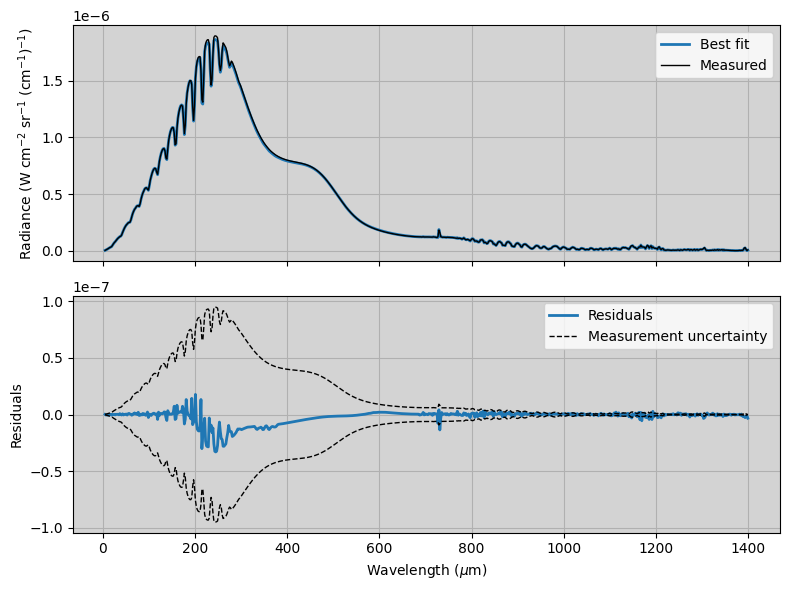

In [9]:
#Making summary plot
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(8,6),sharex=True)

ax1.plot(wave,specret,label='Best fit',linewidth=2.)
ax1.plot(wave,specmeas,label='Measured',c='black',linewidth=1)

ax2.plot(wave,specret-specmeas,linewidth=2.,label='Residuals')
ax2.plot(wave,specerrmeas,c='black',linewidth=1,label='Measurement uncertainty',linestyle='--')
ax2.plot(wave,-specerrmeas,c='black',linewidth=1,linestyle='--')
ax2.legend()

ax1.grid()
ax2.grid()
ax1.legend()
ax1.set_facecolor('lightgray')
ax2.set_facecolor('lightgray')
ax2.set_xlabel('Wavelength ($\mu$m)')
ax1.set_ylabel('Radiance (W cm$^{-2}$ sr$^{-1}$ (cm$^{-1}$)$^{-1}$)')
ax2.set_ylabel('Residuals')
plt.tight_layout()

### Reading the retrieved profile

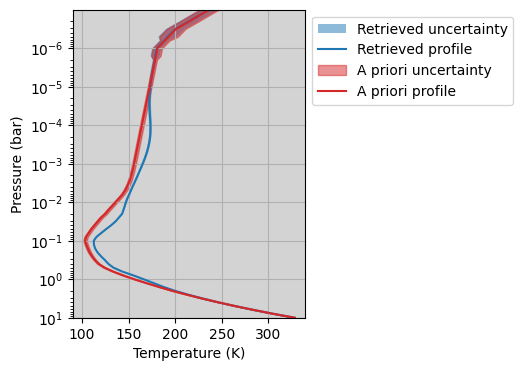

In [15]:
fig,ax1 = plt.subplots(1,1,figsize=(3,4))

ivar = 0   #First (and only) variable
ax1.fill_betweenx(Atmosphere.P/1.0e5,retprof[0:Var.NXVAR[ivar],ivar]-reterr[0:Var.NXVAR[ivar],ivar],retprof[0:Var.NXVAR[ivar],ivar]+reterr[0:Var.NXVAR[ivar],ivar],alpha=0.5,label='Retrieved uncertainty')
ax1.plot(retprof[0:Var.NXVAR[ivar],ivar],Atmosphere.P/1.0e5,label='Retrieved profile')
ax1.fill_betweenx(Atmosphere.P/1.0e5,aprprof[0:Var.NXVAR[ivar],ivar]-aprerr[0:Var.NXVAR[ivar],ivar],aprprof[0:Var.NXVAR[ivar],ivar]+aprerr[0:Var.NXVAR[ivar],ivar],alpha=0.5,label='A priori uncertainty',color='tab:red')
ax1.plot(aprprof[0:Var.NXVAR[ivar],ivar],Atmosphere.P/1.0e5,label='A priori profile',c='tab:red')
ax1.set_yscale('log')
ax1.set_ylim(Atmosphere.P.max()/1.0e5,Atmosphere.P.min()/1.0e5)
ax1.set_xlabel('Temperature (K)')
ax1.set_ylabel('Pressure (bar)')
ax1.grid()
ax1.set_facecolor('lightgray')
ax1.legend(loc='upper left', bbox_to_anchor=(1, 1))

### Validating the retrieval against NEMESIS

In order to test the retrieval calculations in archNEMESIS, we compare the retrieved temperature profile with the analogous from NEMESIS (i.e., Fortran version). 

In [16]:
#Reading .mre file computed with the fortran version
lat,lon,ngeom,ny,wave,specret,specmeas,specerrmeas,nx,Var,aprprof,aprerr,retprof_fortran,reterr_fortran = ans.Files.read_mre('cirstest_fortran')

#Reading the .mre computed with archNEMESIS
lat,lon,ngeom,ny,wave,specret,specmeas,specerrmeas,nx,Var,aprprof,aprerr,retprof,reterr = ans.Files.read_mre(runname)

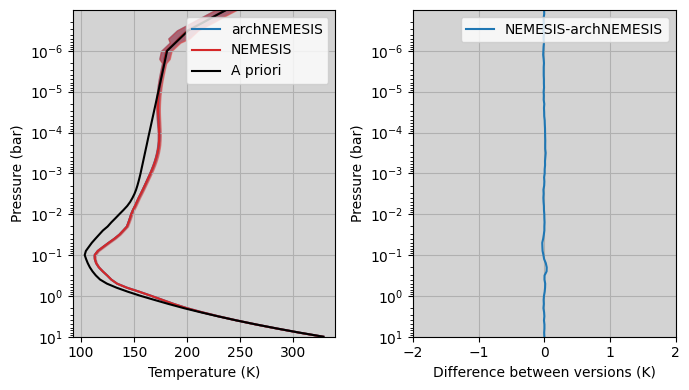

In [29]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(7,4))

ivar = 0   #First (and only) variable

ax1.fill_betweenx(Atmosphere.P/1.0e5,retprof[0:Var.NXVAR[ivar],ivar]-reterr[0:Var.NXVAR[ivar],ivar],retprof[0:Var.NXVAR[ivar],ivar]+reterr[0:Var.NXVAR[ivar],ivar],alpha=0.5)
ax1.plot(retprof[0:Var.NXVAR[ivar],ivar],Atmosphere.P/1.0e5,label='archNEMESIS')
ax1.fill_betweenx(Atmosphere.P/1.0e5,retprof_fortran[0:Var.NXVAR[ivar],ivar]-reterr_fortran[0:Var.NXVAR[ivar],ivar],retprof_fortran[0:Var.NXVAR[ivar],ivar]+reterr_fortran[0:Var.NXVAR[ivar],ivar],alpha=0.5,color='tab:red')
ax1.plot(retprof_fortran[0:Var.NXVAR[ivar],ivar],Atmosphere.P/1.0e5,label='NEMESIS',c='tab:red')
ax1.plot(aprprof[0:Var.NXVAR[ivar],ivar],Atmosphere.P/1.0e5,label='A priori',c='black')
ax1.set_yscale('log')
ax1.set_ylim(Atmosphere.P.max()/1.0e5,Atmosphere.P.min()/1.0e5)
ax1.set_xlabel('Temperature (K)')
ax1.set_ylabel('Pressure (bar)')
ax1.grid()
ax1.set_facecolor('lightgray')
ax1.legend(loc='upper right')



ax2.plot(retprof_fortran[0:Var.NXVAR[ivar],ivar]-retprof[0:Var.NXVAR[ivar],ivar],Atmosphere.P/1.0e5,label='NEMESIS-archNEMESIS')

ax2.set_yscale('log')
ax2.set_ylim(Atmosphere.P.max()/1.0e5,Atmosphere.P.min()/1.0e5)
ax2.set_xlabel('Difference between versions (K)')
ax2.set_ylabel('Pressure (bar)')
ax2.grid()
ax2.set_xlim(-2.,2.)
ax2.set_facecolor('lightgray')
ax2.legend(loc='upper right')
plt.tight_layout()
